### Total capacity estimation using recursive AWTLS
This notebook implements the recursive AWTLS method using the same data set you are already familiar with from last week. Remember that the true capacity of this cell is 10.0 Ah.

WTLS estimate after 10 Newton-Raphson iterations: 10.050015 +/- 0.487120
Final AWTLS estimate (using all data): 10.018975 +/- 0.256311


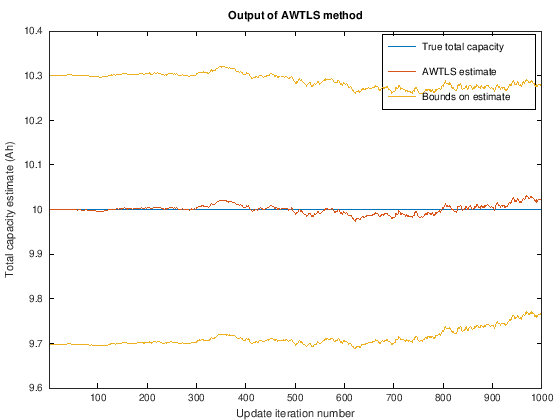

In [1]:
%% Set up data for problem
load readonly/Lesson425data.mat

%% WTLS -- not recursive, uses all data to produce single estimate
sigmax = sqrt(Sigmax); % std-dev of x 
sigmay = sqrt(Sigmay); % std-dev of y
Qhat = 5; % purposefully bad initialization of Qhat
for k = 1:10,
  jacobian = sum((2*(Qhat*x-y).*(Qhat*y.*sigmax.^2+x.*sigmay.^2))./...
                 ((Qhat^2*sigmax.^2+sigmay.^2).^2));
  hessian = sum((2*sigmay.^4.*x.^2+sigmax.^4.*...
                (6*Qhat^2*y.^2-4*Qhat^3*x.*y) - ...
                 sigmax.^2.*sigmay.^2.*...
                (6*Qhat^2*x.^2-12*Qhat*x.*y+2*y.^2))./...
                ((Qhat^2*sigmax.^2+sigmay.^2).^3));
  Qhat = Qhat - jacobian/hessian;
  SigmaQ = 2/hessian;
  boundsQ = 3*sqrt(SigmaQ);
end
fprintf('WTLS estimate after %d Newton-Raphson iterations: %f +/- %f\n',k,Qhat,boundsQ);

%% AWTLS -- recursive, updates estimate every time new data become available
Qnom = 10;                        % Initialize nominal capacity
SYinit = 1e-4;                    % Uncertainty of Q with respect to Qnom
c1 = 1/SYinit;                    % Correct initialization of c1 recursive value
c2 = Qnom/SYinit;                 % Correct initialization of c2 recursive value
c3 = Qnom^2/SYinit;               % Correct initialization of c3 recursive value
% Init c4...c6 assuming SXinit = SYinit to match TLS
c4 = 1/SYinit;                    % Correct initialization of c4 recursive value
c5 = Qnom/SYinit;                 % Correct initialization of c4 recursive value
c6 = Qnom^2/SYinit;               % Correct initialization of c4 recursive value

Qhat = 0*x;                       % Initialize storage for output estimate
SigmaQ = 0*x;                     % Initialize storage for estimation-error variance
for k = 1:length(x),
  c1 = c1 + x(k)^2/Sigmay(k);     % Update c1 recursive parameter
  c2 = c2 + x(k)*y(k)/Sigmay(k);  % Update c2 recursive parameter
  c3 = c3 + y(k)^2/Sigmay(k);     % Update c3 recursive parameter
  c4 = c4 + x(k)^2/Sigmax(k);     % Update c4 recursive parameter
  c5 = c5 + x(k)*y(k)/Sigmax(k);  % Update c5 recursive parameter
  c6 = c6 + y(k)^2/Sigmax(k);     % Update c6 recursive parameter
  
  r = roots([c5 (-c1+2*c4-c6) (3*c2-3*c5) (c1-2*c3+c6) -c2]);
  r = r(r==conj(r));
  r = r(r>0);
  Jr = ((1./(r.^2+1).^2).*(r.^4*c4-2*c5*r.^3+(c1+c6)*r.^2-2*c2*r+c3))';
  Q = r(Jr==min(Jr));
  J = min(Jr);
  H = (2/(Q^2+1)^4)*(-2*c5*Q^5+(3*c1-6*c4+3*c6)*Q^4+(-12*c2+16*c5)*Q^3 ...
        +(-8*c1+10*c3+6*c4-8*c6)*Q^2+(12*c2-6*c5)*Q+(c1-2*c3+c6));
  Qhat(k) = Q;
  SigmaQ(k) = 2/H;
end

xvals = 1:length(Qhat);
plot(xvals,10*ones(size(Qhat)),xvals,Qhat,[xvals,NaN,xvals],[Qhat+3*sqrt(SigmaQ),NaN,Qhat-3*sqrt(SigmaQ)]);
xlabel('Update iteration number'); ylabel('Total capacity estimate (Ah)');
title('Output of AWTLS method');   xlim([1 1000]);
legend('True total capacity','AWTLS estimate','Bounds on estimate','location','northeast');

fprintf('Final AWTLS estimate (using all data): %f +/- %f\n',Qhat(end),3*sqrt(SigmaQ(end)));

In [3]:
3*sqrt(SigmaQ)

ans =

 Columns 1 through 8:

   0.30150   0.30150   0.30150   0.30149   0.30149   0.30150   0.30149   0.30150

 Columns 9 through 16:

   0.30150   0.30149   0.30149   0.30149   0.30149   0.30148   0.30148   0.30148

 Columns 17 through 24:

   0.30148   0.30148   0.30149   0.30150   0.30148   0.30148   0.30146   0.30146

 Columns 25 through 32:

   0.30146   0.30146   0.30146   0.30146   0.30147   0.30147   0.30145   0.30145

 Columns 33 through 40:

   0.30145   0.30144   0.30147   0.30147   0.30149   0.30152   0.30151   0.30151

 Columns 41 through 48:

   0.30151   0.30151   0.30151   0.30150   0.30149   0.30149   0.30149   0.30148

 Columns 49 through 56:

   0.30147   0.30147   0.30146   0.30145   0.30144   0.30145   0.30145   0.30144

 Columns 57 through 64:

   0.30142   0.30141   0.30139   0.30141   0.30142   0.30142   0.30141   0.30141

 Columns 65 through 72:

   0.30141   0.30139   0.30137   0.30138   0.30137   0.30137   0.30136   0.30138

 Columns 73 through 80:

   0.301


 Columns 609 through 616:

   0.28782   0.28776   0.28777   0.28772   0.28762   0.28737   0.28725   0.28702

 Columns 617 through 624:

   0.28704   0.28690   0.28670   0.28656   0.28642   0.28635   0.28648   0.28641

 Columns 625 through 632:

   0.28647   0.28640   0.28628   0.28631   0.28615   0.28604   0.28609   0.28595

 Columns 633 through 640:

   0.28596   0.28613   0.28612   0.28605   0.28604   0.28597   0.28577   0.28573

 Columns 641 through 648:

   0.28569   0.28566   0.28572   0.28568   0.28553   0.28551   0.28554   0.28553

 Columns 649 through 656:

   0.28539   0.28534   0.28522   0.28521   0.28519   0.28512   0.28503   0.28496

 Columns 657 through 664:

   0.28501   0.28493   0.28488   0.28492   0.28472   0.28482   0.28486   0.28468

 Columns 665 through 672:

   0.28456   0.28449   0.28443   0.28427   0.28403   0.28398   0.28380   0.28369

 Columns 673 through 680:

   0.28380   0.28377   0.28374   0.28377   0.28372   0.28366   0.28346   0.28349

 Columns 681 throu